In [1]:
# Import Pandas and NumPy libraries
import pandas as pd
import numpy as np
# Read the spam.csv file into a DataFrame
df = pd.read_csv("spam.csv")
 
# Display the first five rows of the DataFrame to preview the data
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
# Import Matplotlib and WordCloud libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Analyze the distribution of message categories
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

# Visualize Spam Message Data Using WordCloud

In [4]:
# Combine all spam messages into one large string
spam_words = ' '.join(list(df[df['Category'] == 'spam']['Message']))
spam_words[:100]

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entr'

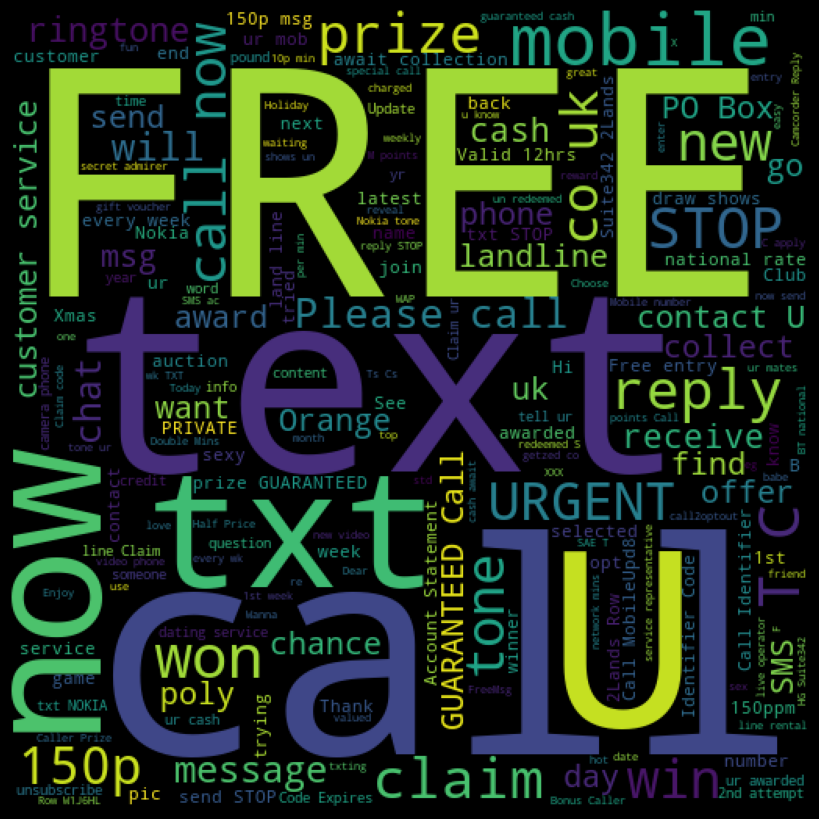

In [5]:
# Generate a word cloud from the spam messages
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
# Set up the plot with specified figure size and background color
plt.figure(figsize = (10, 8), facecolor = 'k')
# Display the word cloud image
plt.imshow(spam_wc)
# Remove axis for visual clarity
plt.axis('off')
# Adjust layout and show the plot
plt.tight_layout(pad = 0)
plt.show()

In [6]:
# Import necessary libraries from sklearn and re module
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
# Define a function to clean the text data
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()              # Convert to lowercase
    text = re.sub(r'\s+', ' ', text) # Replace multiple spaces with a single space
    return text

# Clean all messages in the DataFrame
df['Message'] = df['Message'].apply(clean_text)
df['Message']

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [7]:
# Convert 'ham' and 'spam' labels to 0 and 1
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})
df['Category']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [8]:
# Initialize and apply TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Message']).toarray()
# Extract labels into a separate array
y = df['Category'].values
 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)

In [9]:
# Import TensorFlow and Keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Building the neural network model
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=len(tfidf_vectorizer.get_feature_names_out())))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

2024-07-30 21:57:40.740879: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Compiling the model with additional metrics for handling class imbalance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

In [11]:
# Initialize the EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [12]:
# Training the model with callbacks
history = model.fit(X_train, 
                    y_train, 
                    validation_split=0.2,
                    epochs=10, 
                    batch_size=64, 
                    callbacks=[callback])


Epoch 1/10
56/56 [==============================] - 3s 30ms/step - loss: 0.5849 - accuracy: 0.8407 - precision: 0.1626 - recall: 0.0412 - auc: 0.6576 - val_loss: 0.4614 - val_accuracy: 0.8632 - val_precision: 1.0000 - val_recall: 0.0240 - val_auc: 0.9538
Epoch 2/10
56/56 [==============================] - 1s 22ms/step - loss: 0.3615 - accuracy: 0.8895 - precision: 1.0000 - recall: 0.1876 - auc: 0.9383 - val_loss: 0.2811 - val_accuracy: 0.9081 - val_precision: 1.0000 - val_recall: 0.3440 - val_auc: 0.9755
Epoch 3/10
56/56 [==============================] - 1s 21ms/step - loss: 0.2208 - accuracy: 0.9436 - precision: 0.9965 - recall: 0.5876 - auc: 0.9770 - val_loss: 0.1778 - val_accuracy: 0.9540 - val_precision: 1.0000 - val_recall: 0.6720 - val_auc: 0.9845
Epoch 4/10
56/56 [==============================] - 1s 21ms/step - loss: 0.1415 - accuracy: 0.9691 - precision: 1.0000 - recall: 0.7732 - auc: 0.9872 - val_loss: 0.1226 - val_accuracy: 0.9753 - val_precision: 1.0000 - val_recall: 0.824

In [13]:
# Import necessary functions from scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
# Predict on the test set and apply a threshold to get binary labels
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
# Generate and print the classification report
print(classification_report(y_test, y_pred))

35/35 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       978
           1       0.98      0.93      0.95       137

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Notice that the model demonstrates high precision and recall for classifying non-spam (label 0) and spam emails (label 1), with almost perfect scores in identifying non-spam messages and slightly lower, yet still robust, performance on spam.

In [14]:
# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[976   2]
 [ 10 127]]


# Visualization Performance Metrics

In [15]:
# Accessing the history object for performance metrics
train_auc = history.history['auc']
train_precision = history.history['precision']
train_recall = history.history['recall']
train_accuracy = history.history['accuracy']
val_auc = history.history['val_auc']
val_precision = history.history['val_precision']
val_recall = history.history['val_recall']
val_accuracy = history.history['val_accuracy']

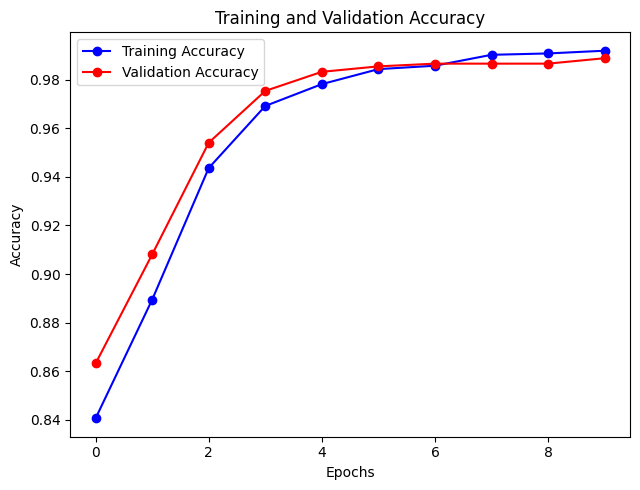

In [16]:
# Setting up the plot environment
plt.figure(figsize=(18, 5))
 
# Plotting training & validation accuracy
plt.subplot(1, 3, 1)
plt.plot(train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

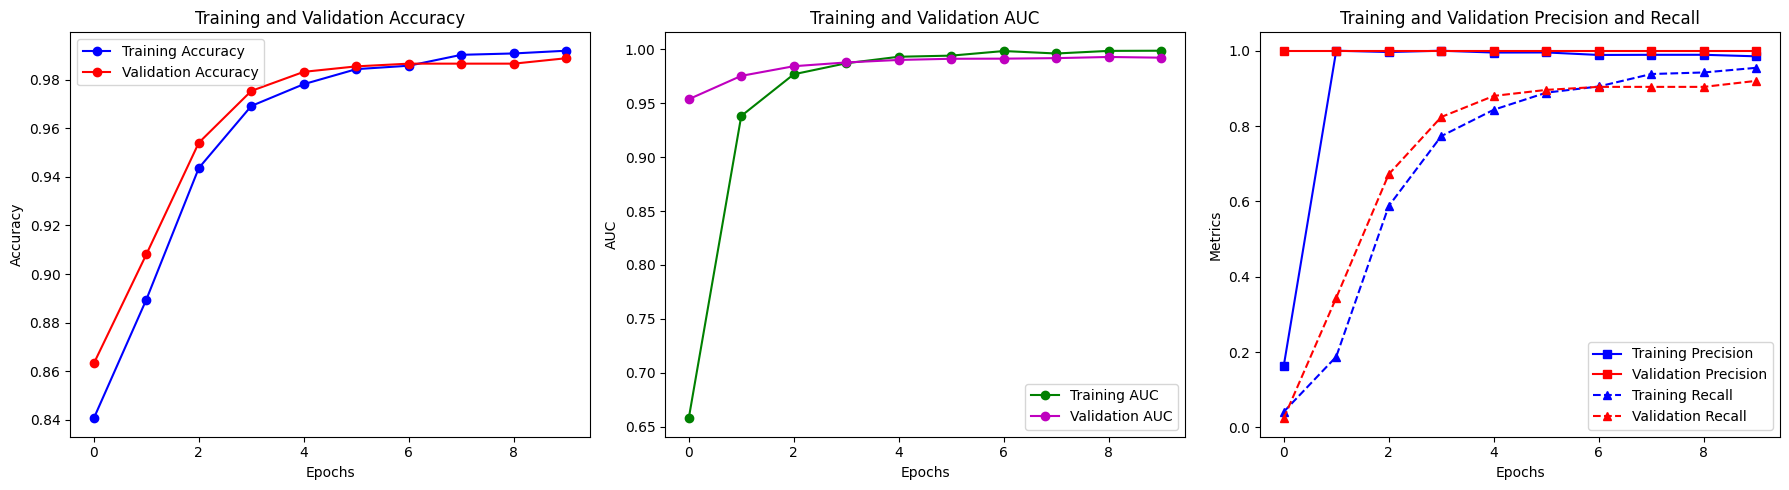

In [17]:
# Setting up the plot environment
plt.figure(figsize=(18, 5))
 
# Plotting training & validation accuracy
plt.subplot(1, 3, 1)
plt.plot(train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# Plotting training & validation AUC
plt.subplot(1, 3, 2)
plt.plot(train_auc, 'go-', label='Training AUC')
plt.plot(val_auc, 'mo-', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
 
# Plotting training & validation precision and recall
plt.subplot(1, 3, 3)
plt.plot(train_precision, 'bs-', label='Training Precision')
plt.plot(val_precision, 'rs-', label='Validation Precision')
plt.plot(train_recall, 'b^--', label='Training Recall')
plt.plot(val_recall, 'r^--', label='Validation Recall')
plt.title('Training and Validation Precision and Recall')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
 
# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

Notice that the model exhibits strong performance, with training and validation accuracy, as well as AUC, nearing optimal levels, suggesting it is well-tuned to the task of spam detection. Precision and recall metrics also indicate a high ability to identify spam emails accurately, although the validation recall is marginally lower, implying a conservative approach to classifying emails as spam.

# Hyperparameter Optimization

Parameters to include:

First Layer: Add a Dense layer with units ranging from 32 to 512 (inclusive). This range is specified by hp.Int('units', min_value=32, max_value=512, step=32). The relu activation function should be used.

Dropout Layer: Include a Dropout layer to prevent overfitting. The dropout rate is a tunable hyperparameter ranging from 0.0 to 0.5, with a default of 0.25 and a step of 0.05 (hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)).

Compile the Model: Compile the model with a binary cross-entropy loss function. Use the Adam optimizer with a tunable learning rate (hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])). Include accuracy as a metric.

Initialize the Hyperband Tuner:

Set the objective to 'val_auc' to focus on maximizing the validation AUC.

Limit the maximum epochs to 10 and use a factor of 3 for computational efficiency.

Set Up Early Stopping: Define an EarlyStopping callback to monitor the validation loss ('val_loss') and set a patience of 5 epochs.

Execute Hyperparameter Search:

Pass the training data (X_train, y_train) and specify 10 epochs for each trial.

Use a validation split of 0.2 to evaluate the model performance during training.

Include the EarlyStopping callback in the search process.

In [18]:
# Import Keras Tuner
import keras_tuner as kt
 
# Define the model building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    # Add a dense layer with a dynamic number of units and 'relu' activation
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_dim=len(tfidf_vectorizer.get_feature_names_out())))
    # Add a dropout layer with a tunable dropout rate - to prevent overfitting
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)))
    # Add the output layer with a sigmoid activation for binary classification
    model.add(Dense(units=1, activation='sigmoid'))
 
    # Compile the model with a tunable learning rate for the Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', 
                                                               values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

In [19]:
# Initialize the Hyperband tuner
tuner = kt.Hyperband(build_model,
                     objective=kt.Objective('val_auc', direction='max'),
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')
 
# Define an EarlyStopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Execute the hyperparameter search over the training data
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 16 Complete [00h 00m 17s]
val_auc: 0.9926518201828003

Best val_auc So Far: 0.9928240180015564
Total elapsed time: 00h 05m 15s

Search: Running Trial #17

Value             |Best Value So Far |Hyperparameter
288               |224               |units
0.1               |0.05              |dropout
0.001             |0.01              |learning_rate
10                |2                 |tuner/epochs
4                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
2                 |0                 |tuner/round
0013              |None              |tuner/trial_id

Epoch 5/10
 56/112 [==============>...............] - ETA: 4s - loss: 0.0144 - accuracy: 0.9972 - auc: 0.9999

In [ ]:
# Get the best hyperparameters from the search
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
 
# Print the optimal hyperparameters
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
 
# Rebuild the model with the best hyperparameters
best_model = build_model(best_hp)

In [ ]:
# Assuming 'df' is your full DataFrame and has already undergone necessary preprocessing steps
# Apply TF-IDF transformation to the 'Message' column
X_full = tfidf_vectorizer.transform(df['Message']).toarray()  
y_full = df['Category'].values  # Assuming 'Category' column contains the labels
# Fit the model on the full dataset
best_model.fit(X_full, y_full, epochs=10, batch_size=32)

In [ ]:
# Assuming X_test and y_test are your test datasets
evaluation_results = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation_results[0]}, Test Accuracy: {evaluation_results[1]}")

In [ ]:
# Save the model in HDF5 format
best_model.save("text_classification_model.keras")